# Testing Gradient Boosting on lag 1 and lag 7 data

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np

In [116]:
data_1=pd.read_csv('data_lag1.csv',index_col=0)
data_1.head()

,datestop,x,y,SAF_COUNT,311_complaints_COUNT,passenger_count_pickup,total_amount_pickup,passenger_count_dropoff,total_amount_dropoff,NN_SAF,...,NS_TAXI_P_FARE,NS_TAXI_D_FARE,SAF_lag,311_lag,NYPD_lag,TAXI_P_PASSENGER_lag,TAXI_D_PASSENGER_lag,TAXI_P_FARE_lag,TAXI_D_FARE_lag,nypd_complaints_COUNT
0,1372543200,22,14,0.0,0.0,16.0,312.93,26.0,579.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1
1,1372543200,12,7,0.0,0.0,52105.0,374601.91,54970.0,382690.74,0.0,...,0.0,0.0,3.0,26.0,21.0,64307.0,61028.0,459089.86,408074.78,9
2,1372543200,12,15,2.0,12.0,66.0,809.62,461.0,9323.87,0.0,...,0.0,0.0,3.0,25.0,11.0,57.0,390.0,660.83,8008.99,7
3,1372543200,12,14,9.0,10.0,86.0,757.78,923.0,15469.21,0.0,...,0.0,0.0,11.0,56.0,23.0,116.0,896.0,1312.94,15219.87,15
4,1372543200,12,13,9.0,30.0,585.0,5544.04,2652.0,35447.31,0.0,...,0.0,0.0,10.0,52.0,18.0,659.0,2587.0,5611.30,33921.34,5


In [117]:
data_7=pd.read_csv('data_lag7.csv',index_col=0)
data_7.head()

,datestop,x,y,SAF_COUNT,311_complaints_COUNT,passenger_count_pickup,total_amount_pickup,passenger_count_dropoff,total_amount_dropoff,NN_SAF,...,NS_TAXI_P_FARE,NS_TAXI_D_FARE,SAF_lag,311_lag,NYPD_lag,TAXI_P_PASSENGER_lag,TAXI_D_PASSENGER_lag,TAXI_P_FARE_lag,TAXI_D_FARE_lag,nypd_complaints_COUNT
0,1372543200,22,14,0.0,0.0,16.0,312.93,26.0,579.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1
1,1372543200,12,7,0.0,0.0,52105.0,374601.91,54970.0,382690.74,0.0,...,0.0,0.0,4.0,38.0,9.0,53490.0,60145.0,371204.39,424270.61,9
2,1372543200,12,15,2.0,12.0,66.0,809.62,461.0,9323.87,0.0,...,0.0,0.0,0.0,42.0,5.0,38.0,405.0,471.89,8388.73,7
3,1372543200,12,14,9.0,10.0,86.0,757.78,923.0,15469.21,0.0,...,0.0,0.0,19.0,47.0,14.0,158.0,939.0,1755.31,15156.58,15
4,1372543200,12,13,9.0,30.0,585.0,5544.04,2652.0,35447.31,0.0,...,0.0,0.0,5.0,41.0,8.0,730.0,2552.0,7227.51,36292.56,5


In [140]:
X_1 = data_1[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_SAF', 'NN_311', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_311', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE', 'NE_SAF',

'NE_311', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_SAF', 'NS_311', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', 'SAF_lag', '311_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()

y_1 = data_1[['nypd_complaints_COUNT']].to_numpy()



In [139]:
X_7 = data_7[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_SAF', 'NN_311', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_311', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE', 'NE_SAF',

'NE_311', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_SAF', 'NS_311', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', 'SAF_lag', '311_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()

y_7 = data_7[['nypd_complaints_COUNT']].to_numpy()



In [141]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=.2, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_7, y_7, test_size=.2, random_state=42)

In [142]:
from sklearn.metrics import mean_squared_error

In [143]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

need to scale for svm to work better!!
### Support Vector machines

In [144]:
regr1 = make_pipeline(StandardScaler(), svm.SVR())
regr1.fit(X_train1, y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

aRMSE 2.177582588456455


In [145]:
regr7 = make_pipeline(StandardScaler(), svm.SVR())
regr7.fit(X_train7, y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr7.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

aRMSE 1.5634106890945219


In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [147]:
regr1 = make_pipeline(StandardScaler(),linear_model.Lasso())
regr1.fit(X_train1,y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

aRMSE 1.0547627202353789


In [148]:
regr7 = make_pipeline(StandardScaler(),linear_model.Lasso())
regr7.fit(X_train7,y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr7.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

aRMSE 0.9827734606233235


In [149]:
regr1=make_pipeline(StandardScaler(),RandomForestRegressor()).fit(X_train1,y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

aRMSE 0.006061551621541203


In [150]:
regr7=make_pipeline(StandardScaler(),RandomForestRegressor()).fit(X_train7,y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr1.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

aRMSE 0.00285839007414132


In [151]:
regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1,y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

aRMSE 0.0017773979677851042


In [152]:
regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7,y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr1.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

aRMSE 0.00041419405719613265


+ trying some nearest neighbour if possible!!

In [153]:
from sklearn.neighbors import KNeighborsRegressor

In [154]:
regr1=make_pipeline(StandardScaler(),KNeighborsRegressor()).fit(X_train1,y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

aRMSE 3.8080243975007435


In [155]:
regr7=make_pipeline(StandardScaler(),KNeighborsRegressor()).fit(X_train7,y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr1.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

aRMSE 3.3285398698744135


In [52]:
from sklearn.neighbors import RadiusNeighborsRegressor
#will not be using becasue it performs terrible here

In [70]:
regr1=make_pipeline(StandardScaler(),RadiusNeighborsRegressor()).fit(X_train1,y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

aRMSE 2.422271832366395e+37


In [71]:
regr7=make_pipeline(StandardScaler(),RadiusNeighborsRegressor()).fit(X_train7,y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr1.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

aRMSE 2.0202495645423396e+37


Guess we're not using that one ahhahaha, trying again with SGDRegressor and MLPregressor with the standardscaler to see if it helps us with getting better values?! no not for SGDRegressor, sure it gave better result but not nearly good enought to be considered for the task.

In [156]:
from sklearn.neural_network import MLPRegressor

In [157]:
regr1=make_pipeline(StandardScaler(),MLPRegressor()).fit(X_train1,y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

aRMSE 0.018537281269497174


In [158]:
regr7=make_pipeline(StandardScaler(),MLPRegressor()).fit(X_train7,y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr1.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

aRMSE 0.0036999347099115187


## New attempt with K-fold and standardscaler in the pipeline

In [159]:
from sklearn.model_selection import ShuffleSplit

In [160]:
ss = ShuffleSplit(n_splits=5, test_size=0.20,random_state=42)

In [161]:
aRMSE1=[]
i=0
for train, test in ss.split(X_1):
    X_train1ss, X_test1ss, y_train1ss, y_test1ss = X_1[train], X_1[test], y_1[train], y_1[test]
    regr1=make_pipeline(StandardScaler(),MLPRegressor()).fit(X_train1ss,y_train1ss.ravel())
    aRMSE1.append(mean_squared_error(y_test1ss.ravel(), regr1.predict(X_test1ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE1[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE1), 'for shufflesplit validation lag: 1 day, model: MLPRegressor')

0.03783170955537885 for shufflesplit validation lag: 1 day, model: MLPRegressor


In [162]:
aRMSE7=[]
i=0
for train, test in ss.split(X_7):
    X_train7ss, X_test7ss, y_train7ss, y_test7ss = X_7[train], X_7[test], y_7[train], y_7[test]
    regr7=make_pipeline(StandardScaler(),MLPRegressor()).fit(X_train7ss,y_train7ss.ravel())
    aRMSE7.append(mean_squared_error(y_test7ss.ravel(), regr7.predict(X_test7ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE7[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE7),'for shufflesplit validation lag: 7 day, model: MLPRegressor')

0.032997691503888496 for shufflesplit validation lag: 7 day, model: MLPRegressor


In [163]:
aRMSE7=[]
i=0
for train, test in ss.split(X_7):
    X_train7ss, X_test7ss, y_train7ss, y_test7ss = X_7[train], X_7[test], y_7[train], y_7[test]
    regr7=make_pipeline(StandardScaler(),RandomForestRegressor()).fit(X_train7ss,y_train7ss.ravel())
    aRMSE7.append(mean_squared_error(y_test7ss.ravel(), regr7.predict(X_test7ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE7[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE7),'for shufflesplit validation lag: 7 day, model: RandomForestRegressor')

0.003962086548645787 for shufflesplit validation lag: 7 day, model: RandomForestRegressor


In [164]:
aRMSE1=[]
i=0
for train, test in ss.split(X_1):
    X_train1ss, X_test1ss, y_train1ss, y_test1ss = X_1[train], X_1[test], y_1[train], y_1[test]
    regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1ss,y_train1ss.ravel())
    aRMSE1.append(mean_squared_error(y_test1ss.ravel(), regr1.predict(X_test1ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE7[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE1),'for shufflesplit validation lag: 1 day, model: GradientBoostingRegressor')

0.001198805037930691 for shufflesplit validation lag: 1 day, model: GradientBoostingRegressor


 testing other scalers, such as normalizer aswell.

In [165]:

aRMSE7=[]
i=0
for train, test in ss.split(X_7):
    X_train7ss, X_test7ss, y_train7ss, y_test7ss = X_7[train], X_7[test], y_7[train], y_7[test]
    regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7ss,y_train7ss.ravel())
    aRMSE7.append(mean_squared_error(y_test7ss.ravel(), regr7.predict(X_test7ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE7[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE7))

0.0009258135304499173


In [166]:
from sklearn.preprocessing import Normalizer

In [167]:
aRMSE7=[]
i=0
for train, test in ss.split(X_7):
    X_train7ss, X_test7ss, y_train7ss, y_test7ss = X_7[train], X_7[test], y_7[train], y_7[test]
    regr7=make_pipeline(Normalizer(),GradientBoostingRegressor()).fit(X_train7ss,y_train7ss.ravel())
    aRMSE7.append(mean_squared_error(y_test7ss.ravel(), regr7.predict(X_test7ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE7[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE7))

43.64854058049916


In [168]:
aRMSE7=[]
i=0
for train, test in ss.split(X_7):
    X_train7ss, X_test7ss, y_train7ss, y_test7ss = X_7[train], X_7[test], y_7[train], y_7[test]
    regr7=make_pipeline(Normalizer(),RandomForestRegressor()).fit(X_train7ss,y_train7ss.ravel())
    aRMSE7.append(mean_squared_error(y_test7ss.ravel(), regr7.predict(X_test7ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE7[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE7))

30.782760117946186


In [169]:
aRMSE1=[]
i=0
for train, test in ss.split(X_1):
    X_train1ss, X_test1ss, y_train1ss, y_test1ss = X_1[train], X_1[test], y_1[train], y_1[test]
    regr1=make_pipeline(Normalizer(),linear_model.Lasso()).fit(X_train1ss,y_train1ss.ravel())
    aRMSE1.append(mean_squared_error(y_test1ss.ravel(), regr1.predict(X_test1ss), multioutput='uniform_average'))
    #print('aRMSE',aRMSE1[i], 'for one version of KFold', i)
    #i+=1
print(np.mean(aRMSE1))

67.68220243550618


so, standardscaler is SIGNIFICANTLY better than normalizer here.

# now correlation matrixes & feature analysis

In [75]:
import seaborn as sns


<AxesSubplot:>

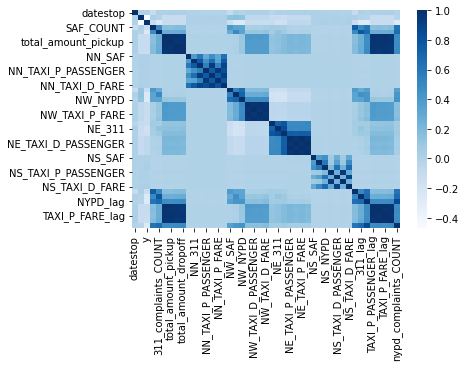

In [89]:
sns.heatmap(data_7.corr(),cmap="Blues")

Too hard to see anything, aswell as I dont think all features can be considered. Will only check the ones for today, aswell as the NYPD-values for all the neighbours and the lag.

<AxesSubplot:>

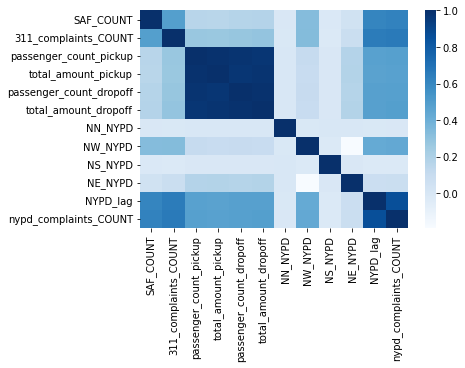

In [88]:
sns.heatmap(data_1[[ 'SAF_COUNT', '311_complaints_COUNT',
       'passenger_count_pickup', 'total_amount_pickup',
       'passenger_count_dropoff', 'total_amount_dropoff','NN_NYPD','NW_NYPD','NS_NYPD','NE_NYPD','NYPD_lag','nypd_complaints_COUNT']].corr(),cmap="Blues")

<AxesSubplot:>

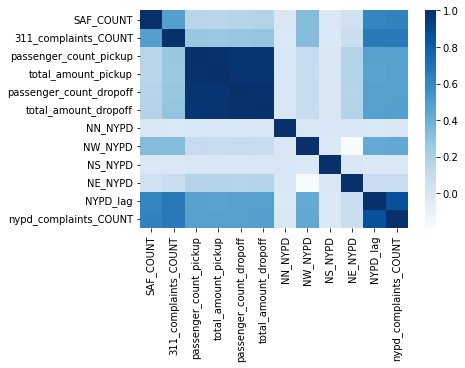

In [87]:
sns.heatmap(data_7[[ 'SAF_COUNT', '311_complaints_COUNT',
       'passenger_count_pickup', 'total_amount_pickup',
       'passenger_count_dropoff', 'total_amount_dropoff','NN_NYPD','NW_NYPD','NS_NYPD','NE_NYPD','NYPD_lag','nypd_complaints_COUNT']].corr(),cmap="Blues")

## gradientBoostingRegressor but minus 1 feature and its values

regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7,y_train7.ravel())
aRMSE7=mean_squared_error(y_test7.ravel(), regr7.predict(X_test7), multioutput='uniform_average')
print('aRMSE',aRMSE7)

regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1,y_train1.ravel())
aRMSE1=mean_squared_error(y_test1.ravel(), regr1.predict(X_test1), multioutput='uniform_average')
print('aRMSE',aRMSE1)

In [170]:
X_1_saf = data_1[['datestop', 'x', 'y', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_311', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_311', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE',

'NE_311', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_311', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', '311_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()

y_1 = data_1[['nypd_complaints_COUNT']].to_numpy()

In [171]:
X_1_311 = data_1[['datestop', 'x', 'y', 'SAF_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_SAF', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE', 'NE_SAF', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_SAF', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', 'SAF_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()


In [172]:
X_1_taxi = data_1[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT', 'NN_SAF', 'NN_311', 'NN_NYPD',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_311', 'NW_NYPD', 'NE_SAF',

'NE_311', 'NE_NYPD', 'NS_SAF', 'NS_311', 'NS_NYPD', 'SAF_lag', '311_lag', 'NYPD_lag', 'nypd_complaints_COUNT']].to_numpy()

In [173]:
X_1_neigh = data_1[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'SAF_lag', '311_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()


X_1_lag = data_1[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_SAF', 'NN_311', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_311', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE', 'NE_SAF',

'NE_311', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_SAF', 'NS_311', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', 'nypd_complaints_COUNT']].to_numpy()

In [174]:
X_7_saf = data_7[['datestop', 'x', 'y', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_311', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_311', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE',

'NE_311', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_311', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', '311_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()

y_7 = data_7[['nypd_complaints_COUNT']].to_numpy()

X_7_311 = data_7[['datestop', 'x', 'y', 'SAF_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_SAF', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE', 'NE_SAF', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_SAF', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', 'SAF_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()

X_7_taxi = data_7[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT', 'NN_SAF', 'NN_311', 'NN_NYPD',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_311', 'NW_NYPD', 'NE_SAF',

'NE_311', 'NE_NYPD', 'NS_SAF', 'NS_311', 'NS_NYPD', 'SAF_lag', '311_lag', 'NYPD_lag', 'nypd_complaints_COUNT']].to_numpy()


X_7_neigh = data_7[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'SAF_lag', '311_lag', 'NYPD_lag',

'TAXI_P_PASSENGER_lag', 'TAXI_D_PASSENGER_lag', 'TAXI_P_FARE_lag',

'TAXI_D_FARE_lag', 'nypd_complaints_COUNT']].to_numpy()


X_7_lag = data_7[['datestop', 'x', 'y', 'SAF_COUNT', '311_complaints_COUNT',

'passenger_count_pickup', 'total_amount_pickup',

'passenger_count_dropoff', 'total_amount_dropoff', 'NN_SAF', 'NN_311', 'NN_NYPD',

'NN_TAXI_P_PASSENGER', 'NN_TAXI_D_PASSENGER', 'NN_TAXI_P_FARE',

'NN_TAXI_D_FARE', 'NW_SAF', 'NW_311', 'NW_NYPD', 'NW_TAXI_P_PASSENGER',

'NW_TAXI_D_PASSENGER', 'NW_TAXI_P_FARE', 'NW_TAXI_D_FARE', 'NE_SAF',

'NE_311', 'NE_NYPD', 'NE_TAXI_P_PASSENGER', 'NE_TAXI_D_PASSENGER',

'NE_TAXI_P_FARE', 'NE_TAXI_D_FARE', 'NS_SAF', 'NS_311', 'NS_NYPD',

'NS_TAXI_P_PASSENGER', 'NS_TAXI_D_PASSENGER', 'NS_TAXI_P_FARE',

'NS_TAXI_D_FARE', 'nypd_complaints_COUNT']].to_numpy()

In [175]:
X_train1_311, X_test1_311, y_train1_311, y_test1_311 = train_test_split(X_1_311, y_1, test_size=.2, random_state=42)
X_train7_311, X_test7_311, y_train7_311, y_test7_311 = train_test_split(X_7_311, y_7, test_size=.2, random_state=42)

X_train1_saf, X_test1_saf, y_train1_saf, y_test1_saf = train_test_split(X_1_saf, y_1, test_size=.2, random_state=42)
X_train7_saf, X_test7_saf, y_train7_saf, y_test7_saf = train_test_split(X_7_saf, y_7, test_size=.2, random_state=42)

X_train1_taxi, X_test1_taxi, y_train1_taxi, y_test1_taxi = train_test_split(X_1_taxi, y_1, test_size=.2, random_state=42)
X_train7_taxi, X_test7_taxi, y_train7_taxi, y_test7_taxi = train_test_split(X_7_taxi, y_7, test_size=.2, random_state=42)

X_train1_neigh, X_test1_neigh, y_train1_neigh, y_test1_neigh = train_test_split(X_1_neigh, y_1, test_size=.2, random_state=42)
X_train7_neigh, X_test7_neigh, y_train7_neigh, y_test7_neigh = train_test_split(X_7_neigh, y_7, test_size=.2, random_state=42)

X_train1_lag, X_test1_lag, y_train1_lag, y_test1_lag = train_test_split(X_1_lag, y_1, test_size=.2, random_state=42)
X_train7_lag, X_test7_lag, y_train7_lag, y_test7_lag = train_test_split(X_7_lag, y_7, test_size=.2, random_state=42)

311 complaints

In [176]:
regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1_311,y_train1_311.ravel())
aRMSE1=mean_squared_error(y_test1_311.ravel(), regr1.predict(X_test1_311), multioutput='uniform_average')
print('aRMSE',aRMSE1,'for GradientBoostingRegressor minus 311 complaints lag 1')

regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7_311,y_train7_311.ravel())
aRMSE7=mean_squared_error(y_test7_311.ravel(), regr7.predict(X_test7_311), multioutput='uniform_average')
print('aRMSE',aRMSE7,'for GradientBoostingRegressor minus 311 complaints lag 7')

aRMSE 0.0017857391517231856 for GradientBoostingRegressor minus 311 complaints lag 1
aRMSE 0.0013895284485207606 for GradientBoostingRegressor minus 311 complaints lag 7


saf

In [177]:
regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1_saf,y_train1_saf.ravel())
aRMSE1=mean_squared_error(y_test1_saf.ravel(), regr1.predict(X_test1_saf), multioutput='uniform_average')
print('aRMSE',aRMSE1,'for GradientBoostingRegressor minus saf complaints lag 1')

regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7_saf,y_train7_saf.ravel())
aRMSE7=mean_squared_error(y_test7_saf.ravel(), regr7.predict(X_test7_saf), multioutput='uniform_average')
print('aRMSE',aRMSE7,'for GradientBoostingRegressor minus saf complaints lag 7')

aRMSE 0.001826921884520987 for GradientBoostingRegressor minus saf complaints lag 1
aRMSE 0.0013976282502486527 for GradientBoostingRegressor minus saf complaints lag 7


taxi

In [178]:
regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1_taxi,y_train1_taxi.ravel())
aRMSE1=mean_squared_error(y_test1_taxi.ravel(), regr1.predict(X_test1_taxi), multioutput='uniform_average')
print('aRMSE',aRMSE1,'for GradientBoostingRegressor minus taxi complaints lag 1')

regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7_taxi,y_train7_taxi.ravel())
aRMSE7=mean_squared_error(y_test7_taxi.ravel(), regr7.predict(X_test7_taxi), multioutput='uniform_average')
print('aRMSE',aRMSE7,'for GradientBoostingRegressor minus taxi complaints lag 7')

aRMSE 0.0018795194244052489 for GradientBoostingRegressor minus taxi complaints lag 1
aRMSE 0.0010761305678599036 for GradientBoostingRegressor minus taxi complaints lag 7


neighbours

In [179]:
regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1_neigh,y_train1_neigh.ravel())
aRMSE1=mean_squared_error(y_test1_neigh.ravel(), regr1.predict(X_test1_neigh), multioutput='uniform_average')
print('aRMSE',aRMSE1,'for GradientBoostingRegressor minus neigh lag 1')

regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7_neigh,y_train7_neigh.ravel())
aRMSE7=mean_squared_error(y_test7_neigh.ravel(), regr7.predict(X_test7_neigh), multioutput='uniform_average')
print('aRMSE',aRMSE7,'for GradientBoostingRegressor minus neighbour info lag 7')

aRMSE 0.002132407028508389 for GradientBoostingRegressor minus neigh lag 1
aRMSE 0.0012533750957996242 for GradientBoostingRegressor minus neighbour info lag 7


days lag

In [180]:
regr1=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train1_lag,y_train1_lag.ravel())
aRMSE1=mean_squared_error(y_test1_lag.ravel(), regr1.predict(X_test1_lag), multioutput='uniform_average')
print('aRMSE',aRMSE1,'for GradientBoostingRegressor minus lag 1 ')

regr7=make_pipeline(StandardScaler(),GradientBoostingRegressor()).fit(X_train7_lag,y_train7_lag.ravel())
aRMSE7=mean_squared_error(y_test7_lag.ravel(), regr7.predict(X_test7_lag), multioutput='uniform_average')
print('aRMSE',aRMSE7,'for GradientBoostingRegressor minus lag 7')

aRMSE 0.0015688863819538032 for GradientBoostingRegressor minus lag 1 
aRMSE 0.0011756070922773608 for GradientBoostingRegressor minus lag 7
